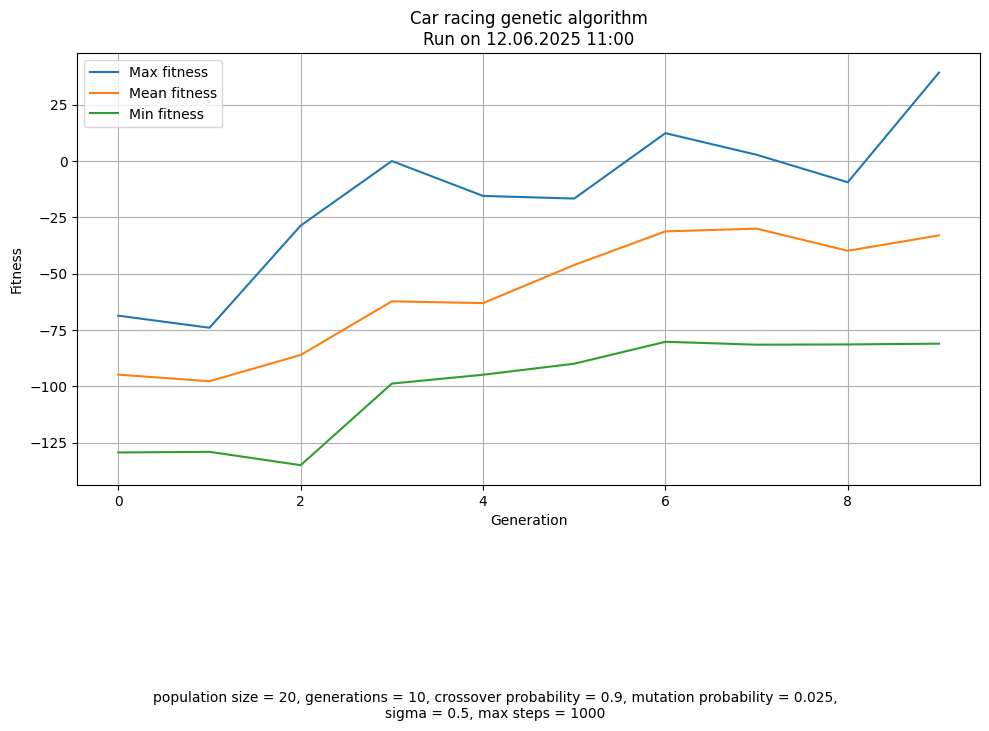

In [7]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt

# Find latest run folder
folders = sorted(glob.glob("C:/Users/maksb/Desktop/car-racing-rl/data/generations/*"))
latest = folders[-1]

# Load fitness history
with open(f"{latest}/fitness_history.json", "r") as f:
    history = json.load(f)

# Load global metadata
with open(f"{latest}/meta.json", "r") as f:
    meta = json.load(f)

# Format timestamp
raw_ts = meta['timestamp']  # Format: 'rrrrmmdd_hhmm'
date_part, time_part = raw_ts.split("_")
formatted_date = f"{date_part[6:8]}.{date_part[4:6]}.{date_part[:4]} {time_part[:2]}:{time_part[2:]}"

# Build metadata string
meta_str = (
    f"population size = {meta['pop_size']}, generations = {meta['generations']}, "
    f"crossover probability = {meta['p_crossover']}, mutation probability = {meta['p_mutation']},\n"
    f"sigma = {meta['sigma']}, max steps = {meta['max_steps']}"
)

# Extract data
gens = [h["generation"] for h in history]
maxs = [h["max"] for h in history]
means = [h["mean"] for h in history]
mins = [h["min"] for h in history]

# Plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(gens, maxs, label="Max fitness")
ax.plot(gens, means, label="Mean fitness")
ax.plot(gens, mins, label="Min fitness")
ax.set_xlabel("Generation")
ax.set_ylabel("Fitness")
ax.set_title(f"Car racing genetic algorithm\nRun on {formatted_date}")
ax.legend()
ax.grid(True)

# Add metadata below the plot
plt.figtext(0.5, -0.08, meta_str, wrap=True, horizontalalignment='center', fontsize=10)

# Adjust layout to make space for metadata
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # leave more space below
plt.subplots_adjust(bottom=0.25)

plt.show()
